## Life cycle of Machine learning Project

* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

### Problem Statement
To understand how the student's performance is affected by variables such as gender, ethinicity, parental level of education, test preparation etc.

Dataset - from Kaggle Students performance in Exams https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

In [6]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams["figure.figsize"] = (5.0,4.0)
#model training
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



In [9]:
#read the file
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df['gender'].dtype

dtype('O')

In [14]:
cat_variables = [col for col in df.columns if df[col].dtype == 'O']
cat_variables

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [15]:
for i in cat_variables:
    print(f"Categories in {i} variable---> {df[i].unique()}")


Categories in gender variable---> ['female' 'male']
Categories in race/ethnicity variable---> ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable---> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable---> ['standard' 'free/reduced']
Categories in test preparation course variable---> ['none' 'completed']


In [24]:
X = df.drop(['math score'],axis=1)
y = df['math score']
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [25]:
num_features = X.select_dtypes(exclude="object").columns
num_features

Index(['reading score', 'writing score'], dtype='object')

In [27]:
#pipeline for onehot encoding and feature scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

#for transforming the respective columns
preprocess = ColumnTransformer(
    [
        ("OneHotEncoder",onehot_transformer, cat_variables),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [28]:
X = preprocess.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [29]:
X.shape

(1000, 19)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape,X_test.shape

((800, 19), (200, 19))

## Create an Evaluation metric function after model training

In [31]:
def evaluate_model(y_actual, y_pred):
    mae = mean_absolute_error(y_actual,y_pred)
    mse = mean_squared_error(y_actual,y_pred)
    rmse = np.sqrt(mse)
    r2_squared = r2_score(y_actual, y_pred)
    return mae, mse, rmse, r2_squared


In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regrssion" : Ridge(),
    "KN Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()

}
model_list = []
r2_list_train = []
r2_list_test = []

for key,val in models.items():
    model = val
    model.fit(X_train,y_train)

    #make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate Train and Test data
    mae_train, mse_train, rmse_train, r2score_train = evaluate_model(y_train, y_train_pred)
    mae_test, mse_test, rmse_test, r2score_test = evaluate_model(y_test,y_test_pred)
    
    print(key)
    model_list.append(key)
    print("Model Performance for Training set")
    print("* Root Mean Squared Error : {:.4f}".format(rmse_train))
    print("* Mean Absolute Error: {:.4f}".format(mae_train))
    print("* R2 Score: {:.4f}".format(r2score_train))
    r2_list_train.append(r2score_train) 
    print("*"*40)

    print("Model Performance for Test set")
    print("* Root Mean Squared Error : {:.4f}".format(rmse_test))
    print("* Mean Absolute Error: {:.4f}".format(mae_test))
    print("* R2 Score: {:.4f}".format(r2score_test))
    r2_list_test.append(r2score_test)
    print("-"*40,"\n")


Linear Regression
Model Performance for Training set
* Root Mean Squared Error : 5.3293
* Mean Absolute Error: 4.2715
* R2 Score: 0.8740
****************************************
Model Performance for Test set
* Root Mean Squared Error : 5.4252
* Mean Absolute Error: 4.2222
* R2 Score: 0.8790
---------------------------------------- 

Lasso Regression
Model Performance for Training set
* Root Mean Squared Error : 6.5938
* Mean Absolute Error: 5.2063
* R2 Score: 0.8071
****************************************
Model Performance for Test set
* Root Mean Squared Error : 6.5197
* Mean Absolute Error: 5.1579
* R2 Score: 0.8253
---------------------------------------- 

Ridge Regrssion
Model Performance for Training set
* Root Mean Squared Error : 5.3233
* Mean Absolute Error: 4.2650
* R2 Score: 0.8743
****************************************
Model Performance for Test set
* Root Mean Squared Error : 5.3904
* Mean Absolute Error: 4.2111
* R2 Score: 0.8806
--------------------------------------

In [46]:
df_result = pd.DataFrame(list(zip(model_list,r2_list_train,r2_list_test)), columns=['Model Name','Train R2_Score', 'Test R2_Score']).sort_values(by=['Test R2_Score'],ascending=False).reset_index(drop=True)
df_result

,Model Name,Train R2_Score,Test R2_Score
0,Ridge Regrssion,0.874304,0.880593
1,Linear Regression,0.874023,0.879046
2,RandomForest Regressor,0.976289,0.851956
3,CatBoost Regressor,0.958936,0.851632
4,AdaBoost Regressor,0.849063,0.838438
5,XGB Regressor,0.995500,0.827797
6,Lasso Regression,0.807146,0.825320
7,KN Regressor,0.855488,0.783813
8,Decision Tree,0.999653,0.736725


Since Linear Regrssion model train and test accuyracy is good, we choose LinearRegression model

In [52]:
LR_model = LinearRegression(fit_intercept=True)
LR_model = LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
score = r2_score(y_test,y_pred) * 100
print("Accuracy of the model is {:.2f}%".format(score))

Accuracy of the model is 87.90%


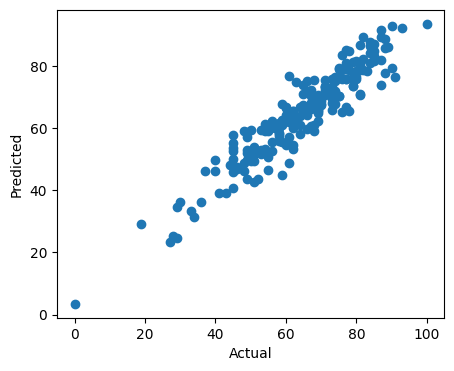

In [54]:
#plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

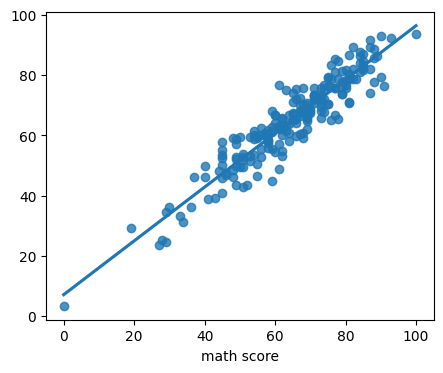

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None);

In [57]:
#Difference between actual and predicted value
df_diff = pd.DataFrame({'Actual Value':y_test,"Predicted_Value":y_pred,"Difference":y_test-y_pred})
df_diff

,Actual Value,Predicted_Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
